#**Inteligencia artificial**
##**Proyecto de unidad I - Junio, 2023**

---



>**Integrantes**
*   Anselmo César Farfan Pajuelo
*   Jean Carlos Escobar Arcaya
*   Johan Marcos Condori Orellana
*   Alvaro Alejandro Rivera Ramirez
*   Romel Nelson Roy Melchor Rosas



---
Librerías del proyecto

In [2]:
import pandas as pd # Para lectura de datos inicial
import numpy as np  # Para manejo de matrices con numpy
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.io import arff # Para lectura de archivo .arff
from sklearn.model_selection import train_test_split  # Para separar los conjunto de datos en evaluación y entrenamiento
from sklearn.metrics import confusion_matrix #Para la matriz de confusión
from keras.models import Sequential # Para el uso de modelos secuenciales
from keras.layers import Dense  # Para establecer capas densas en el modelo

##**Regresión**

###**Problema a resolver** <br>
Realizar un modelo de regresión que determine el grado de carga ideal de calefacción y refrigeración para una eficiencia energética, en función de las características de unos edificios.

X1: Compacidad relativa <br>
X2: Superficie <br>
X3: Superficie de pared <br>
X4: Superficie del techo <br>
X5: Altura total <br>
X6: Orientación <br>
X7: Superficie acristalada <br>
X8: Distribución de la superficie acristalada <br>
y1: Carga de calefacción <br>
y2: Carga de refrigeración <br>

###**Procedimiento**

> 1. Carga del data set en el espacio de trabajo

In [3]:
dataset = pd.read_excel('/content/ENB2012_data.xlsx', index_col=None)
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


> 2. Particionamos la data en dos grupos:entrenamiento y prueba

In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(
    test_dataset
)

       X1     X2     X3     X4   X5  X6   X7  X8     Y1     Y2
9    0.86  588.0  294.0  147.0  7.0   3  0.0   0  19.95  21.97
11   0.86  588.0  294.0  147.0  7.0   5  0.0   0  18.31  27.87
19   0.79  637.0  343.0  147.0  7.0   5  0.0   0  28.75  39.44
23   0.76  661.5  416.5  122.5  7.0   5  0.0   0  23.93  29.40
28   0.71  710.5  269.5  220.5  3.5   2  0.0   0   6.37  11.27
..    ...    ...    ...    ...  ...  ..  ...  ..    ...    ...
746  0.74  686.0  245.0  220.5  3.5   4  0.4   5  14.17  16.94
753  0.69  735.0  294.0  220.5  3.5   3  0.4   5  14.28  15.87
754  0.69  735.0  294.0  220.5  3.5   4  0.4   5  14.37  16.54
759  0.66  759.5  318.5  220.5  3.5   5  0.4   5  15.16  18.06
763  0.64  784.0  343.0  220.5  3.5   5  0.4   5  17.88  21.40

[154 rows x 10 columns]


> 3. Separamos los 2 objetivos (Y1 y Y2) para poder normalizar los datos y entrenar al modelo.

In [5]:
x_train = train_dataset.drop(["Y1","Y2"], axis=1)
y1_train = train_dataset[["Y1"]]
y2_train = train_dataset[["Y2"]]
x_test = test_dataset.drop(["Y1","Y2"], axis=1)
y1_test = test_dataset[["Y1"]]
y2_test = test_dataset[["Y2"]]
y_sup_train=pd.concat([y1_train,y2_train],axis=1)
y_sup_test=pd.concat([y1_test,y2_test],axis=1)

> 4. Normalizamos los dos grupos de datos, utilizando como fuente principal al grupo de entrenamiento.

In [6]:
train_mean = x_train.mean()
train_std = x_train.std()
x_train = (x_train - train_mean) / train_std
x_test = (x_test - train_mean) / train_std

> 5. Creación del modelo con la particularidad de tener 2 neuronas en la capa de salida. Además se agregará 2 capas ocultas dado que estamos ante una regresión multivariable.

In [7]:
model = Sequential([
    Dense(128, activation="relu", input_shape=[len(x_train.keys())]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(2)
])

> 6. Resumen del modelo de red neuronal con la cantidad de neuronas por capa y parámetros.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 11,554
Trainable params: 11,554
Non-trainable params: 0
_________________________________________________________________


> 7. Configuramos el modelo para el entrenamiento especificando la función de perdida, optimizador y métricas de error. Luego entrenamos el modelo.

In [9]:
model.compile(loss="mse", optimizer='adam', metrics=["mae", "mse"])

In [10]:
# Train the model
history= model.fit(x_train, y_sup_train, epochs=250,validation_data=(x_test,y_sup_test))

Epoch 1/250
20/20 [==============================] - 2s 16ms/step - loss: 650.7614 - mae: 23.5499 - mse: 650.7614 - val_loss: 544.9696 - val_mae: 21.2066 - val_mse: 544.9696
Epoch 2/250
20/20 [==============================] - 0s 5ms/step - loss: 554.5865 - mae: 21.5521 - mse: 554.5865 - val_loss: 396.2463 - val_mae: 17.7289 - val_mse: 396.2463
Epoch 3/250
20/20 [==============================] - 0s 15ms/step - loss: 295.5849 - mae: 14.7628 - mse: 295.5849 - val_loss: 100.1773 - val_mae: 7.6373 - val_mse: 100.1773
Epoch 4/250
20/20 [==============================] - 0s 7ms/step - loss: 73.5554 - mae: 6.0729 - mse: 73.5554 - val_loss: 45.8361 - val_mae: 4.5232 - val_mse: 45.8361
Epoch 5/250
20/20 [==============================] - 0s 5ms/step - loss: 45.8734 - mae: 4.6745 - mse: 45.8734 - val_loss: 31.1412 - val_mae: 3.7517 - val_mse: 31.1412
Epoch 6/250
20/20 [==============================] - 0s 4ms/step - loss: 32.1746 - mae: 4.0466 - mse: 32.1746 - val_loss: 26.3492 - val_mae: 3.572

> 8. Evaluando el modelo

In [11]:
test_loss, test_mae, test_mse = model.evaluate(x_test, y_sup_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.8444 - mae: 0.6283 - mse: 0.8444


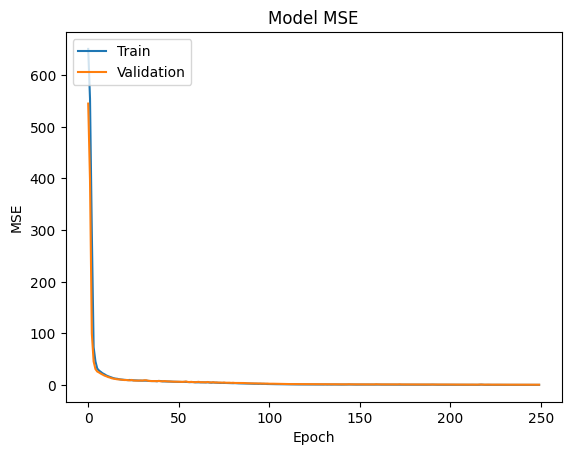

In [12]:
# Plot the training history
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

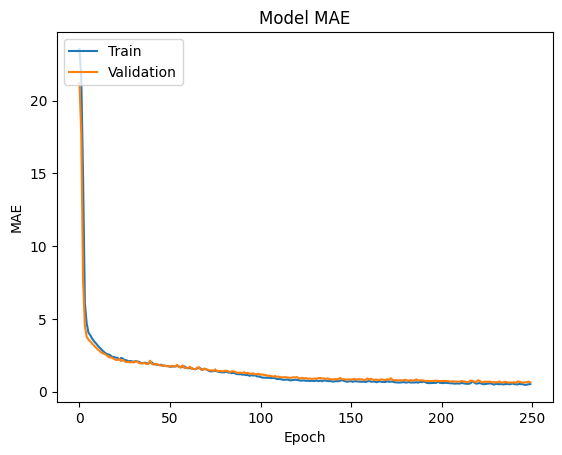

In [14]:
plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.title("Model MAE")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()


> 9. Realizamos la predicción con el grupo de prueba

In [15]:
results= model.predict(x_test)
results

5/5 [==============================] - 0s 2ms/step


array([[20.38315  , 23.548683 ],
       [20.014378 , 27.789215 ],
       [28.666872 , 36.11689  ],
       [25.771854 , 32.159275 ],
       [ 6.4180527, 11.618481 ],
       [ 7.2134666, 12.423293 ],
       [ 7.710264 , 13.014441 ],
       [10.626492 , 16.524378 ],
       [10.552133 , 16.538815 ],
       [10.8067665, 16.46648  ],
       [ 8.279979 , 12.981082 ],
       [30.000015 , 30.141891 ],
       [26.658495 , 26.621128 ],
       [26.18884  , 27.389286 ],
       [32.410904 , 33.231644 ],
       [ 9.9251175, 13.399829 ],
       [11.394805 , 14.523516 ],
       [10.989276 , 14.274958 ],
       [11.674073 , 14.509535 ],
       [11.316316 , 14.608055 ],
       [11.483563 , 14.797912 ],
       [15.186515 , 19.138212 ],
       [12.279462 , 14.6094   ],
       [12.102925 , 14.853984 ],
       [25.178556 , 26.091316 ],
       [25.211859 , 27.095406 ],
       [36.563427 , 38.43565  ],
       [32.922333 , 33.65763  ],
       [10.599177 , 13.827644 ],
       [11.308526 , 14.370316 ],
       [11

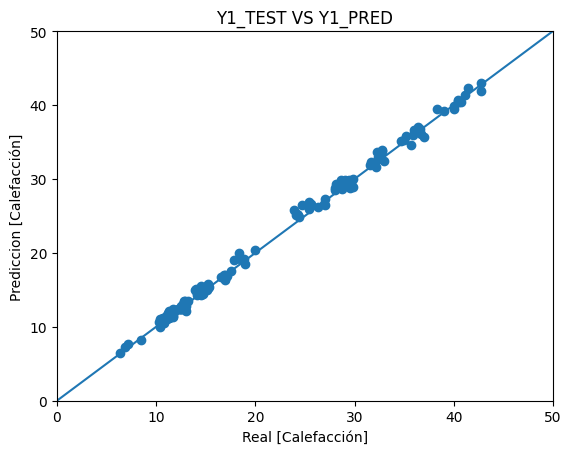

In [16]:
y1_pred=results[:,0]
plt.title("Y1_TEST VS Y1_PRED")
plt.scatter(y1_test, y1_pred)
plt.xlabel('Real [Calefacción]')
plt.ylabel('Prediccion [Calefacción]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

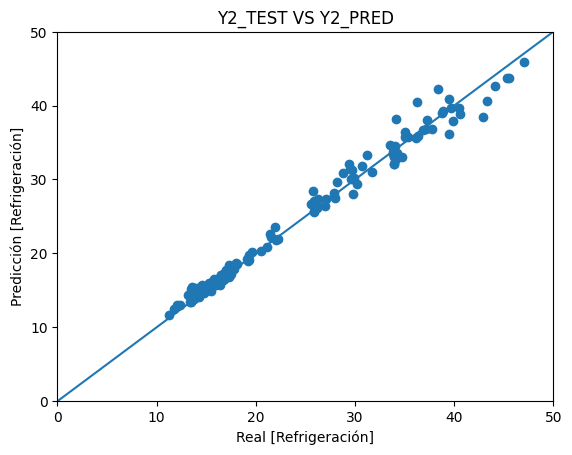

In [17]:
y2_pred=results[:,1]
# y2_pred=results
plt.title("Y2_TEST VS Y2_PRED")
plt.scatter(y2_test, y2_pred)
plt.xlabel('Real [Refrigeración]')
plt.ylabel('Predicción [Refrigeración]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

> 10. Comparación de resultados

20/20 [==============================] - 0s 1ms/step


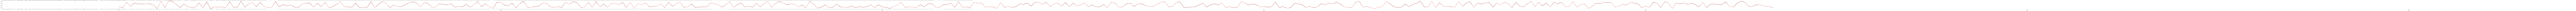

In [18]:
plt.figure(figsize=(614,2))

plt.plot(np.arange(614), y1_train, linewidth=1, color='black')
plt.plot(np.arange(614), model.predict(x_train)[:,0], linewidth=1, color='red')

plt.show()

5/5 [==============================] - 0s 3ms/step


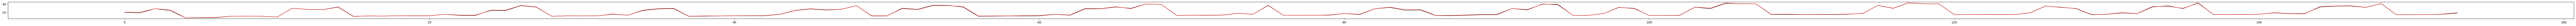

In [19]:
plt.figure(figsize=(154,1))

plt.plot(np.arange(154), y1_test, linewidth=1, color='black')
plt.plot(np.arange(154), model.predict(x_test)[:,0], linewidth=1, color='red')

plt.show()

20/20 [==============================] - 0s 2ms/step


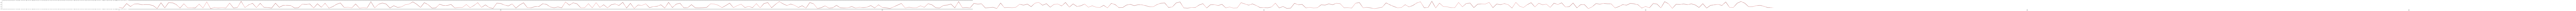

In [20]:
plt.figure(figsize=(614,2))

plt.plot(np.arange(614), y2_train, linewidth=1, color='black')
plt.plot(np.arange(614), model.predict(x_train)[:,1], linewidth=1, color='red')

plt.show()

5/5 [==============================] - 0s 4ms/step


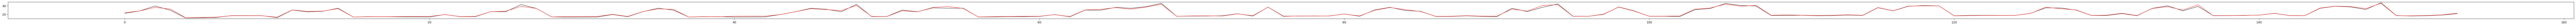

In [21]:
plt.figure(figsize=(154,1))

plt.plot(np.arange(154), y2_test, linewidth=1, color='black')
plt.plot(np.arange(154), model.predict(x_test)[:,1], linewidth=1, color='red')

plt.show()

**PARTE COMPARATIVA ENTRE NORMALIZACION POR ESTANDARIZACION Y MAX MIN**

Ingresamos la normalizacion por maxmin para comparar con los resultados obtenidos con la normalizacion por estandarizacion
Se destaca que la normalizacion por max min estala los datos de 0 a 1 y la normalizacion por estandarizacion la media esta en 0 siempre.

La ventaja que tiene la normalizacion por estandarizacion es que ayuda en la convergencia, o en otras palabras al ser 0 su media el calculo de los pesos se hace mas rapido y por lo tanto llega a mejores resultados

In [22]:
x_train_maxmin=(x_train-np.min(x_train,axis=0))/(np.max(x_train,axis=0)-np.min(x_train,axis=0))
x_test_maxmin=(x_test-np.min(x_test,axis=0))/(np.max(x_test,axis=0)-np.min(x_test,axis=0))


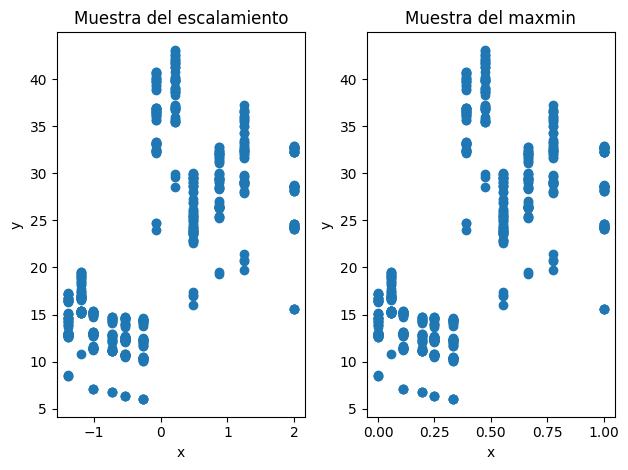

In [23]:

x_trainx_estand =pd.concat([x_train["X1"],y1_train],axis=1)
x_trainx1_maxmin =pd.concat([x_train_maxmin["X1"],y1_train],axis=1)
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].set_title("Muestra del escalamiento")
axs[0].scatter(x_trainx_estand['X1'], x_trainx_estand['Y1'])
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].set_title("Muestra del maxmin")
axs[1].scatter(x_trainx1_maxmin['X1'], x_trainx1_maxmin['Y1'])
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.tight_layout()
plt.show()


Compararemos los resultados con normalizacion max min y los resultados con normalizacion una vez entrenados

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 11,554
Trainable params: 11,554
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
20/20 [==============================] - 2s 14ms/step - loss: 642.3264 - mae: 23.3531 - mse: 642.3264 - val_loss: 534.5205 - val_mae: 20.8684 - val_mse: 534.5205
Epoch 2/

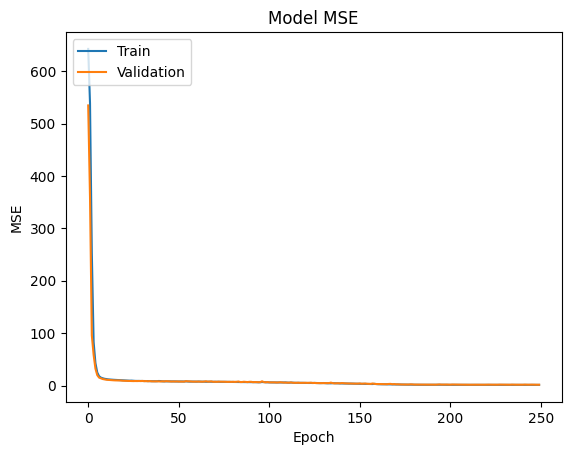

5/5 [==============================] - 0s 3ms/step


In [24]:
dataset = pd.read_excel('/content/ENB2012_data.xlsx', index_col=None)
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
x_train = train_dataset.drop(["Y1","Y2"], axis=1)
y1_train = train_dataset[["Y1"]]
y2_train = train_dataset[["Y2"]]
x_test = test_dataset.drop(["Y1","Y2"], axis=1)
y1_test = test_dataset[["Y1"]]
y2_test = test_dataset[["Y2"]]
y_sup_train=pd.concat([y1_train,y2_train],axis=1)
y_sup_test=pd.concat([y1_test,y2_test],axis=1)
model = Sequential([
    Dense(128, activation="relu", input_shape=[len(x_train.keys())]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(2,activation="linear")
])
model.summary()
model.compile(loss="mse", optimizer='adam', metrics=["mae", "mse"])
history= model.fit(x_train_maxmin, y_sup_train, epochs=250,validation_data=(x_test_maxmin,y_sup_test))
test_loss, test_mae, test_mse = model.evaluate(x_test_maxmin, y_sup_test)

# Plot the training history
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

results_maxmin= model.predict(x_test_maxmin)


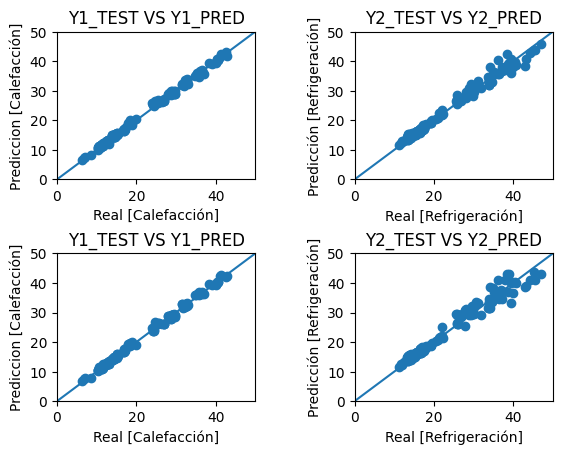

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

y1_pred=results[:,0]
axs[0][0].set_title("Y1_TEST VS Y1_PRED")
axs[0][0].scatter(y1_test, y1_pred)
axs[0][0].set_xlabel('Real [Calefacción]')
axs[0][0].set_ylabel('Prediccion [Calefacción]')
lims = [0, 50]
axs[0][0].set_xlim(lims)
axs[0][0].set_ylim(lims)
axs[0][0].plot(lims, lims)

y2_pred=results[:,1]
# y2_pred=results
axs[0][1].set_title("Y2_TEST VS Y2_PRED")
axs[0][1].scatter(y2_test, y2_pred)
axs[0][1].set_xlabel('Real [Refrigeración]')
axs[0][1].set_ylabel('Predicción [Refrigeración]')
lims = [0, 50]
axs[0][1].set_xlim(lims)
axs[0][1].set_ylim(lims)
axs[0][1].plot(lims, lims)

y1_pred=results_maxmin[:,0]
axs[1][0].set_title("Y1_TEST VS Y1_PRED")
axs[1][0].scatter(y1_test, y1_pred)
axs[1][0].set_xlabel('Real [Calefacción]')
axs[1][0].set_ylabel('Prediccion [Calefacción]')
lims = [0, 50]
axs[1][0].set_xlim(lims)
axs[1][0].set_ylim(lims)
axs[1][0].plot(lims, lims)

y2_pred=results_maxmin[:,1]
# y2_pred=results
axs[1][1].set_title("Y2_TEST VS Y2_PRED")
axs[1][1].scatter(y2_test, y2_pred)
axs[1][1].set_xlabel('Real [Refrigeración]')
axs[1][1].set_ylabel('Predicción [Refrigeración]')
lims = [0, 50]
axs[1][1].set_xlim(lims)
axs[1][1].set_ylim(lims)
axs[1][1].plot(lims, lims)